In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import os

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_period_err1', 'koi_period_err2']]

In [4]:

y= df[['koi_disposition']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=1)

In [5]:
X_train.head()

,koi_period,koi_period_err1,koi_period_err2
3563,10.548413,5.470000e-05,-5.470000e-05
4099,24.754385,1.365000e-04,-1.365000e-04
5460,1.057336,1.230000e-07,-1.230000e-07
1091,201.118319,1.461000e-03,-1.461000e-03
5999,91.649983,3.181000e-03,-3.181000e-03


In [6]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
#grid search
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs= GridSearchCV(
KNeighborsClassifier(),
grid_params,
verbose = 1,
cv = 3,
n_jobs= -1
)

gs_results= gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.7s finished
/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [8]:
print(gs_results.best_params_)
print(gs_results.best_score_)

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
0.6042346976422914


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 1, Train/Test Score: 1.000/0.525


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 3, Train/Test Score: 0.748/0.570


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 5, Train/Test Score: 0.701/0.584


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 7, Train/Test Score: 0.681/0.591


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 9, Train/Test Score: 0.669/0.609


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 11, Train/Test Score: 0.661/0.605


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 13, Train/Test Score: 0.657/0.613


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 15, Train/Test Score: 0.648/0.618


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 17, Train/Test Score: 0.645/0.624


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 19, Train/Test Score: 0.642/0.617


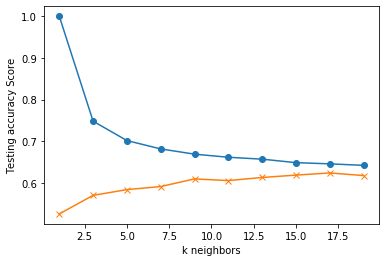

In [18]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
# train_scores = []
# test_scores = []
# for k in range(1, 20, 2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_scaled, y_train)
#     train_score = knn.score(X_train_scaled, y_train)
#     test_score = knn.score(X_test_scaled, y_test)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
# plt.plot(range(1, 20, 2), train_scores, marker='o')
# plt.plot(range(1, 20, 2), test_scores, marker="x")
# plt.xlabel("k neighbors")
# plt.ylabel("Testing accuracy Score")
# plt.savefig('testtrain')
# plt.show()


In [10]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19, weights= "uniform", metric = "manhattan")
knn.fit(X_train_scaled, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=19 Test Acc: 0.642


/Users/fatimadonato/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'fatimaKNN.sav'
joblib.dump(knn, filename)
# model.save("voice_model_trained.h5")

['fatimaKNN.sav']